![title](https://ewscripps.brightspotcdn.com/dims4/default/f2ee804/2147483647/strip/true/crop/2460x400+0+0/resize/1280x208!/quality/90/?url=https%3A%2F%2Fewscripps.brightspotcdn.com%2F49%2Fb5%2Fb9dda5394b178d4ab120f75ff92e%2Fcoronavirus-header-2460x400-2.png)

# <center>Apple Mobility Trends Reports pour l'analyse les mouvements des utilisateurs et connaître sur l'évolution de la pandémie du Covid-19</center>

 <center> <a href="http://www.roqueleal.me">Roque Leal</a> </center>

Dans ce carnet, j'utiliserai les données disponibles sur: https://www.apple.com/covid19/mobility. Nous nous concentrerons sur la France, mais nous comparerons également les résultats avec ceux de l'Allemagne et de Taiwan pour découvrir l'évolution de la pandémie et le comportement de la population.

## Bibliothèques Python

In [1]:
import pandas
import matplotlib.pyplot as plt
import datetime

url = 'https://raw.githubusercontent.com/nshyam97/Apple-Mobility-Trends-Data/master/applemobility.csv'
mobility_data = pandas.read_csv(url, error_bad_lines=False)

Examinons les données du fichier pour obtenir une jauge quant au format et aux données avec lesquelles nous devons travailler et que nous pouvons comparer.

In [2]:
mobility_data.head()

,geo_type,region,transportation_type,alternative_name,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,...,2020-04-24,2020-04-25,2020-04-26,2020-04-27,2020-04-28,2020-04-29,2020-04-30,2020-05-01,2020-05-02,2020-05-03
0,country/region,Albania,driving,NaN,100.0,95.30,101.43,97.20,103.55,112.67,...,30.22,25.22,30.39,37.39,36.69,35.90,38.09,37.23,29.36,36.00
1,country/region,Albania,walking,NaN,100.0,100.68,98.93,98.46,100.85,100.13,...,34.63,29.00,35.22,41.83,37.53,41.49,38.25,38.68,32.28,43.41
2,country/region,Argentina,driving,NaN,100.0,97.07,102.45,111.21,118.45,124.01,...,30.99,25.92,16.57,27.45,27.12,32.22,34.45,22.69,28.23,16.44
3,country/region,Argentina,walking,NaN,100.0,95.11,101.37,112.67,116.72,114.14,...,22.32,23.31,16.36,18.48,17.49,22.78,24.80,16.62,20.61,12.44
4,country/region,Australia,driving,NaN,100.0,102.98,104.21,108.63,109.08,89.00,...,47.84,41.89,55.39,59.09,59.46,59.46,63.12,58.40,48.67,58.18


Comme nous pouvons le voir, nous avons un large tableau avec toutes les dates dans des colonnes distinctes. Bien que ce soit probablement le meilleur moyen d'afficher ces données sans que la région et le type de transport soient répétés plusieurs fois, cela ne rend pas le traçage de ces données ou le filtrage à travers ces données très utiles. Il faudra isoler la région et le type de transport puis transposer les colonnes de date pour permettre de tracer.

Premièrement, nous vérifierons quelles régions et quels types de transport nous avons?

In [3]:
mobility_data['transportation_type'].unique()

array(['driving', 'walking', 'transit'], dtype=object)

In [4]:
mobility_data['region'].unique()

array(['Albania', 'Argentina', 'Australia', 'Austria', 'Belgium',
       'Brazil', 'Bulgaria', 'Cambodia', 'Canada', 'Chile', 'Colombia',
       'Croatia', 'Czech Republic', 'Denmark', 'Egypt', 'Estonia',
       'Finland', 'France', 'Germany', 'Greece', 'Hong Kong', 'Hungary',
       'Iceland', 'India', 'Indonesia', 'Ireland', 'Israel', 'Italy',
       'Japan', 'Latvia', 'Lithuania', 'Luxembourg', 'Macao', 'Malaysia',
       'Mexico', 'Morocco', 'Netherlands', 'New Zealand', 'Norway',
       'Philippines', 'Poland', 'Portugal', 'Republic of Korea',
       'Romania', 'Russia', 'Saudi Arabia', 'Serbia', 'Singapore',
       'Slovakia', 'Slovenia', 'South Africa', 'Spain', 'Sweden',
       'Switzerland', 'Taiwan', 'Thailand', 'Turkey', 'UK', 'Ukraine',
       'United Arab Emirates', 'United States', 'Uruguay', 'Vietnam',
       'Albuquerque', 'Amsterdam', 'Ann Arbor', 'Annapolis', 'Athens',
       'Atlanta', 'Auckland', 'Austin', 'Bakersfield', 'Baltimore',
       'Bangkok', 'Barcelona', '

In [5]:
mobility_data['region'].nunique()

799

Nous avons 3 types de transport différents: transit,walking et driving, mais comme nous pouvons le voir au début du tableau, certains endroits ne disposent pas de données de transit. En regardant la région, nous avons un mélange entre les pays et les grandes villes et un total de 152 lieux uniques. Nous verrons quels endroits ont réellement les données de transit.

![title](https://i0.wp.com/technosports.co.in/wp-content/uploads/2020/04/Mobility-Trends-report-by-Apple_TechnoSports.co_.in_.jpg?fit=530%2C765&ssl=1)

In [6]:
mobility_data[mobility_data['transportation_type'] == 'transit']

,geo_type,region,transportation_type,alternative_name,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,...,2020-04-24,2020-04-25,2020-04-26,2020-04-27,2020-04-28,2020-04-29,2020-04-30,2020-05-01,2020-05-02,2020-05-03
5,country/region,Australia,transit,NaN,100.0,101.78,100.64,99.58,98.34,86.97,...,20.96,19.06,22.74,23.80,23.76,22.35,23.58,23.52,21.41,25.10
10,country/region,Belgium,transit,België,100.0,98.67,105.01,105.87,113.55,110.73,...,26.32,28.81,29.93,28.20,25.95,26.25,28.09,27.73,27.10,33.19
13,country/region,Brazil,transit,Brasil,100.0,102.45,104.28,100.20,97.06,81.01,...,24.37,21.21,18.21,25.24,25.30,25.43,24.75,19.59,20.12,18.01
20,country/region,Canada,transit,NaN,100.0,100.03,98.01,101.01,105.42,89.65,...,20.44,19.56,18.08,21.78,21.66,21.30,21.97,23.68,22.42,22.67
29,country/region,Czech Republic,transit,Česká republika,100.0,98.02,101.88,103.30,107.22,101.48,...,30.75,27.40,32.68,36.04,34.44,33.64,35.42,34.18,30.20,33.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,city,Vancouver,transit,NaN,100.0,93.81,86.78,96.86,104.61,96.55,...,20.60,20.08,18.88,21.50,21.08,20.18,22.20,23.92,21.73,21.83
558,city,Ventura,transit,NaN,100.0,110.01,106.44,100.14,95.14,81.83,...,33.62,27.47,23.75,29.90,26.18,24.32,26.61,30.76,29.90,27.61
563,city,Virginia Beach,transit,NaN,100.0,87.07,95.22,93.35,95.13,94.28,...,52.58,51.55,43.39,55.86,52.39,57.73,44.52,64.29,53.42,51.83
566,city,Washington DC,transit,DC,100.0,100.78,103.92,105.02,112.26,96.01,...,17.53,16.78,15.90,18.61,17.97,19.06,17.00,19.33,19.14,17.33


Nous avons 91 sur un total de 152 régions uniques avec des données de transit et elles sont un mélange de pays et de villes. Une lecture rapide montre que seuls les principaux pays et villes ont des données de transit, ce qui est logique car Apple ne disposerait pas de données pour chaque pays ou ville. C'est juste quelque chose à garder à l'esprit pour l'avenir.

Maintenant que nous savons avec quel type de données nous travaillons, nous pouvons commencer à tracer et à comparer différentes villes et pays en utilisant différents types de transport. Nous commencerons par les villes françaises: Paris, Lyon et Toulouse.

Premièrement, nous allons créer une fonction qui prendra la ville ou le pays et le type de transport et créer un bloc de données séparé avec les colonnes de date transposées en lignes séparées et les valeurs correspondantes.

In [7]:
def transpose_df(region_name, transportation):

    df = mobility_data[(mobility_data['region'] == region_name) &
                       (mobility_data['transportation_type'] == transportation)]

    df = df.drop(['geo_type', 'alternative_name'], axis=1)
    df_t = df.melt(['region', 'transportation_type'], var_name='Date', value_name='Value')
    df_t.Date = pandas.to_datetime(df_t.Date, format='%Y-%m-%d')
    df_t.set_index('Date', inplace=True)
    df_t.Value = df_t.Value - df_t.Value.iloc[0]
    df_t.Value = df_t.Value.round(2)
    return df_t

Maintenant que nous avons cette fonction, nous pouvons l'utiliser pour créer des blocs de données pour chacune de nos villes françaises afin que nous puissions les comparer graphiquement. Nous utiliserons d'abord le type de transport «walking» pour les comparer tous.

In [8]:
france = transpose_df('France', 'walking')
paris = transpose_df('Paris', 'walking')
lyon = transpose_df('Lyon', 'walking')
toulouse = transpose_df('Toulouse', 'walking')

In [9]:
paris.head()

,region,transportation_type,Value
Date,,,
2020-01-13,Paris,walking,0.00
2020-01-14,Paris,walking,4.05
2020-01-15,Paris,walking,4.61
2020-01-16,Paris,walking,19.24
2020-01-17,Paris,walking,16.14


Nous avons maintenant une seule colonne de données avec toutes les dates sous forme de lignes et leurs valeurs correspondantes dans la colonne "Value". Nous conservons également les colonnes de région et de type de transport, ce qui cause beaucoup de duplication, mais j'ai pensé qu'il valait mieux les conserver là au cas où quelqu'un reverrait ce bloc de données plus tard dans le code et voulait savoir ce qu'il montrait. Ces colonnes peuvent tout aussi bien être supprimées.

Avant de tracer ces données, il est important de définir ce que les valeurs signifient réellement et pourquoi nous avons soustrait chaque valeur par la première valeur. Sur le site Web Apple Mobility Trends Report, mentionné ci-dessus, nous voyons que la valeur correspond au "nombre relatif de demandes de directions par pays / région ou ville par rapport à un volume de référence au 13 janvier 2020". Si nous regardons en arrière la vue initiale des données lorsque nous les avons chargées pour la première fois, la ligne de base a commencé à 100 et donc en soustrayant 100 de chaque valeur, nous pouvons afficher le graphique comme le pourcentage de changement par rapport à la ligne de base.

Nous pouvons maintenant tracer ces données.

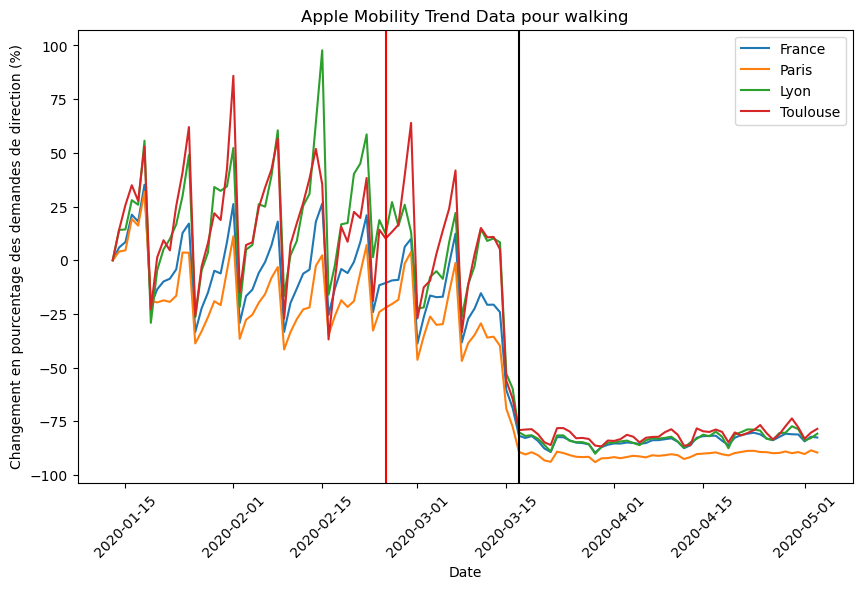

In [10]:
data = [france, paris, lyon, toulouse]
fig=plt.figure(figsize=(10, 6), dpi= 100, facecolor='w', edgecolor='k')
for frame in data:
    plt.plot(frame.index, frame['Value'], label=frame['region'][0])

plt.legend()
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Changement en pourcentage des demandes de direction (%)')
plt.title('Apple Mobility Trend Data pour ' + data[0]['transportation_type'][0])
plt.axvline(pandas.Timestamp('2020-03-17'), color='black')
plt.axvline(pandas.Timestamp('2020-02-25'), color='red')
plt.show()

Dans le graphique, nous pouvons observer le comportement des utilisateurs français liés à leurs requêtes d'adresses pendant qu'ils marchaient vers leur destination, on peut voir comment la période précédant au confinement présente un schéma d'augmentation jusqu'à ce qu'ils descendre rapidement lors de l'initiation du confinament le 17 mars.

Maintenant, avec les données structurées, nous pouvons comparer les enregistrements de décès COVID-19 disponibles auprès du [John Hopkins Institute](https://github.com/CSSEGISandData/COVID-19) pour découvrir leur relation avec les données sur les tendances de la mobilité disponibles pour la France mais aussi pour l'Allemagne et Taïwan.

In [11]:
url='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'

corona_data=pandas.read_csv(url, error_bad_lines=False)
corona_data.head()
    

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,50,57,58,60,64,68,72,85,90,95
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,28,28,30,30,31,31,31,31,31,31
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,425,432,437,444,450,453,459,463,465,470
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,40,40,41,42,42,43,44,45,45,46
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


Comme nous pouvons le voir, le format de ces données est très similaire au format que nous avions auparavant avec les dates toutes définies comme colonnes et les pays et régions comme lignes distinctes. Cela signifie que nous pourrions utiliser une version modifiée de la fonction transpose_df que nous avons créée ci-dessus pour convertir ce tableau dans un format plus utilisable.

In [12]:
corona_data[corona_data['Country/Region'] == 'France']

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20
107,French Guiana,France,3.9339,-53.1258,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
108,French Polynesia,France,-17.6797,149.4068,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
109,Guadeloupe,France,16.2500,-61.5833,0,0,0,0,0,0,...,12,12,12,12,12,12,12,12,12,12
110,Mayotte,France,-12.8275,45.1662,0,0,0,0,0,0,...,4,4,4,4,4,4,4,6,6,9
111,New Caledonia,France,-20.9043,165.6180,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
112,Reunion,France,-21.1351,55.2471,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
113,Saint Barthelemy,France,17.9000,-62.8333,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
114,St Martin,France,18.0708,-63.0501,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
115,Martinique,France,14.6415,-61.0242,0,0,0,0,0,0,...,14,14,14,14,14,14,14,14,14,14
116,NaN,France,46.2276,2.2137,0,0,0,0,0,0,...,22825,23262,23629,24056,24345,24563,24729,24864,25168,25498


Nous sélectionnerons celui consolidé pour la France et nous comparerons les données de mobilité dans un graphique

In [13]:
fr_row = corona_data[(corona_data['Country/Region'] == 'France') & (corona_data['Province/State'].isna())]
fr_row

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20
116,NaN,France,46.2276,2.2137,0,0,0,0,0,0,...,22825,23262,23629,24056,24345,24563,24729,24864,25168,25498


Now that we have the row that we need, we can use a modified function from the one I have created earlier to get the data into a usable format for plotting. One thing also to note is that the dates are in mm/dd/yy format as opposed to the YYYY-mm-dd format used above. We will need to fix this as well.

In [14]:
def transpose_corona_row(df):
    df = df.drop(['Province/State', 'Lat', 'Long'], axis=1)
    df_t = df.melt(['Country/Region'], var_name='Date', value_name='Value')
    df_t.Date = pandas.to_datetime(df_t.Date)
    df_t.set_index('Date', inplace=True)
    return df_t

In [15]:
FR_deaths = transpose_corona_row(fr_row)
FR_deaths

,Country/Region,Value
Date,,
2020-01-22,France,0
2020-01-23,France,0
2020-01-24,France,0
2020-01-25,France,0
2020-01-26,France,0
...,...,...
2020-05-01,France,24563
2020-05-02,France,24729
2020-05-03,France,24864


Nous avons les données dans le bon format, nous pouvons tracer les variables de mobilité et de décès sur le même graphique pour voir leur évolution et voir comment les choses évoluent avec l'augmentation du nombre de décès en France.

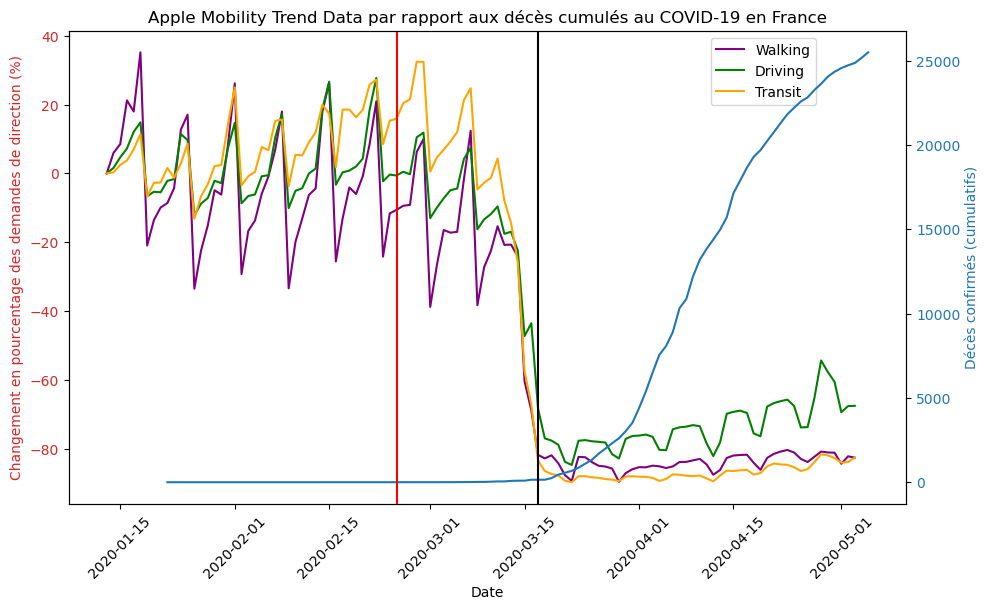

In [29]:
FR_walking = transpose_df('France', 'walking')
FR_driving = transpose_df('France', 'driving')
FR_transit = transpose_df('France', 'transit')
fig, ax1 = plt.subplots(figsize=(10, 6), dpi=100)

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
ax1.set_ylabel('Changement en pourcentage des demandes de direction (%)', color=color)
ax1.plot(FR_walking.index, FR_walking['Value'], label='Walking', color='purple')
ax1.plot(FR_driving.index, FR_driving['Value'], label='Driving', color='green')
ax1.plot(FR_transit.index, FR_transit['Value'], label='Transit', color='orange')
ax1.legend(bbox_to_anchor=(0.9,1), loc='upper right')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  

color = 'tab:blue'
ax2.set_ylabel('Décès confirmés (cumulatifs)', color=color)  
ax2.plot(FR_deaths.index, FR_deaths['Value'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
plt.axvline(pandas.Timestamp('2020-03-17'), color='black')
plt.axvline(pandas.Timestamp('2020-02-25'), color='red')
plt.title('Apple Mobility Trend Data par rapport aux décès cumulés au COVID-19 en France')
plt.show()

Nous pouvons voir que les décès en France commençaient à peine à augmenter lorsque le confinement est entré en vigueur et peu de temps après, le nombre de décès a augmenté de façon exponentielle tandis que la réduction des demandes de mobilité a considérablement diminué, mais il semble que cela n'ait pas eu l'effet souhaité en autorités sanitaires, on retrouve également ce même scénario à Paris, en Allemagne et à Taiwan.

Il convient également de voir la différence entre le premier décès dans le pays (ligne rouge) et le début du confinement (ligne noire), 21 jours se sont écoulés.

## Paris

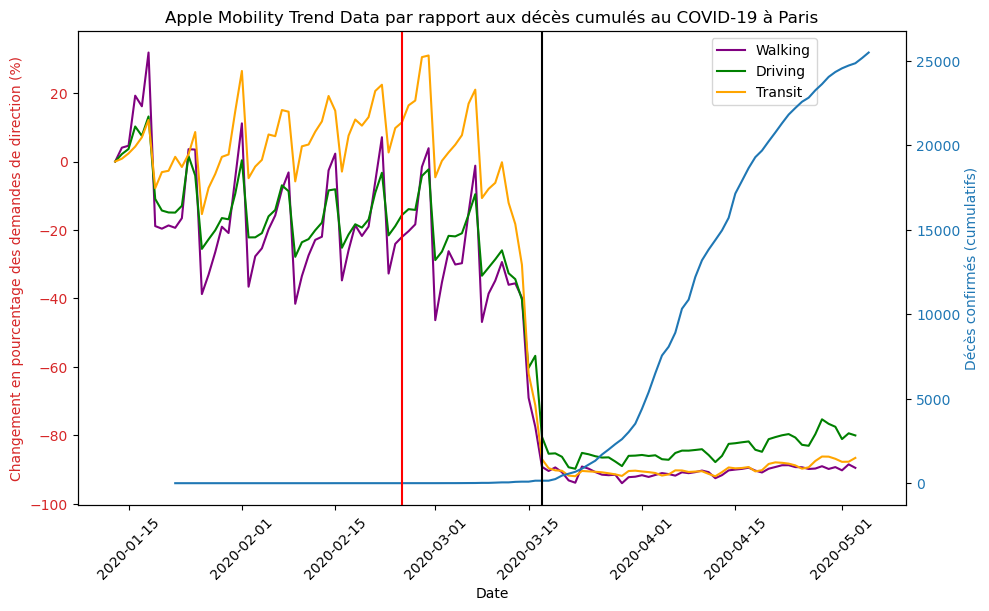

In [25]:
PR_walking = transpose_df('Paris', 'walking')
PR_driving = transpose_df('Paris', 'driving')
PR_transit = transpose_df('Paris', 'transit')
fig, ax1 = plt.subplots(figsize=(10, 6), dpi=100)

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
ax1.set_ylabel('Changement en pourcentage des demandes de direction (%)', color=color)
ax1.plot(PR_walking.index, PR_walking['Value'], label='Walking', color='purple')
ax1.plot(PR_driving.index, PR_driving['Value'], label='Driving', color='green')
ax1.plot(PR_transit.index, PR_transit['Value'], label='Transit', color='orange')
ax1.legend(bbox_to_anchor=(0.9,1), loc='upper right')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  

color = 'tab:blue'
ax2.set_ylabel('Décès confirmés (cumulatifs)', color=color) 
ax2.plot(FR_deaths.index, FR_deaths['Value'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout() 
plt.axvline(pandas.Timestamp('2020-03-17'), color='black')
plt.axvline(pandas.Timestamp('2020-02-25'), color='red')
plt.title('Apple Mobility Trend Data par rapport aux décès cumulés au COVID-19 à Paris')
plt.show()

## Allemagne

In [26]:
AL_row = corona_data[(corona_data['Country/Region'] == 'Germany') & (corona_data['Province/State'].isna())]
AL_row

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20
120,NaN,Germany,51.0,9.0,0,0,0,0,0,0,...,5976,6126,6314,6467,6623,6736,6812,6866,6993,6993


In [27]:
AL_deaths = transpose_corona_row(AL_row)
AL_deaths

,Country/Region,Value
Date,,
2020-01-22,Germany,0
2020-01-23,Germany,0
2020-01-24,Germany,0
2020-01-25,Germany,0
2020-01-26,Germany,0
...,...,...
2020-05-01,Germany,6736
2020-05-02,Germany,6812
2020-05-03,Germany,6866


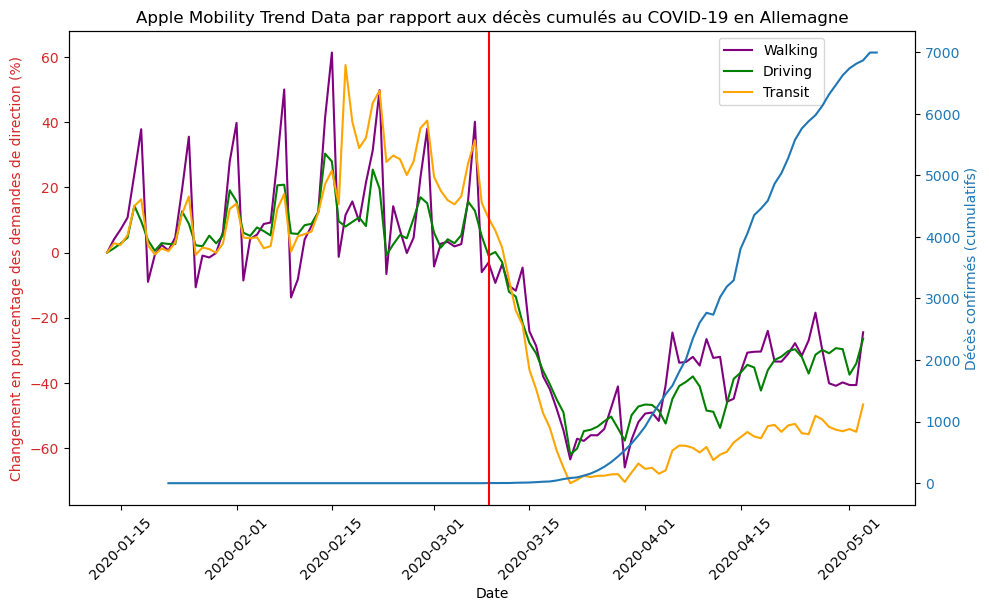

In [28]:
AL_walking = transpose_df('Germany', 'walking')
AL_driving = transpose_df('Germany', 'driving')
AL_transit = transpose_df('Germany', 'transit')
fig, ax1 = plt.subplots(figsize=(10, 6), dpi=100)

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
ax1.set_ylabel('Changement en pourcentage des demandes de direction (%)', color=color)
ax1.plot(AL_walking.index, AL_walking['Value'], label='Walking', color='purple')
ax1.plot(AL_driving.index, AL_driving['Value'], label='Driving', color='green')
ax1.plot(AL_transit.index, AL_transit['Value'], label='Transit', color='orange')
ax1.legend(bbox_to_anchor=(0.9,1), loc='upper right')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  

color = 'tab:blue'
ax2.set_ylabel('Décès confirmés (cumulatifs)', color=color)  
ax2.plot(AL_deaths.index, AL_deaths['Value'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.axvline(pandas.Timestamp('2020-03-09'), color='red')
plt.title('Apple Mobility Trend Data par rapport aux décès cumulés au COVID-19 en Allemagne')
plt.show()

Dans ce cas, la mobilité a diminué depuis le premier rapport de décès, puis la mobilité a augmenté.

## Taiwan

In [30]:
TW_row = corona_data[(corona_data['Country/Region'] == 'Taiwan*') & (corona_data['Province/State'].isna())]
TW_row

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20
207,NaN,Taiwan*,23.7,121.0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6


In [31]:
TW_deaths = transpose_corona_row(TW_row)
TW_deaths

,Country/Region,Value
Date,,
2020-01-22,Taiwan*,0
2020-01-23,Taiwan*,0
2020-01-24,Taiwan*,0
2020-01-25,Taiwan*,0
2020-01-26,Taiwan*,0
...,...,...
2020-05-01,Taiwan*,6
2020-05-02,Taiwan*,6
2020-05-03,Taiwan*,6


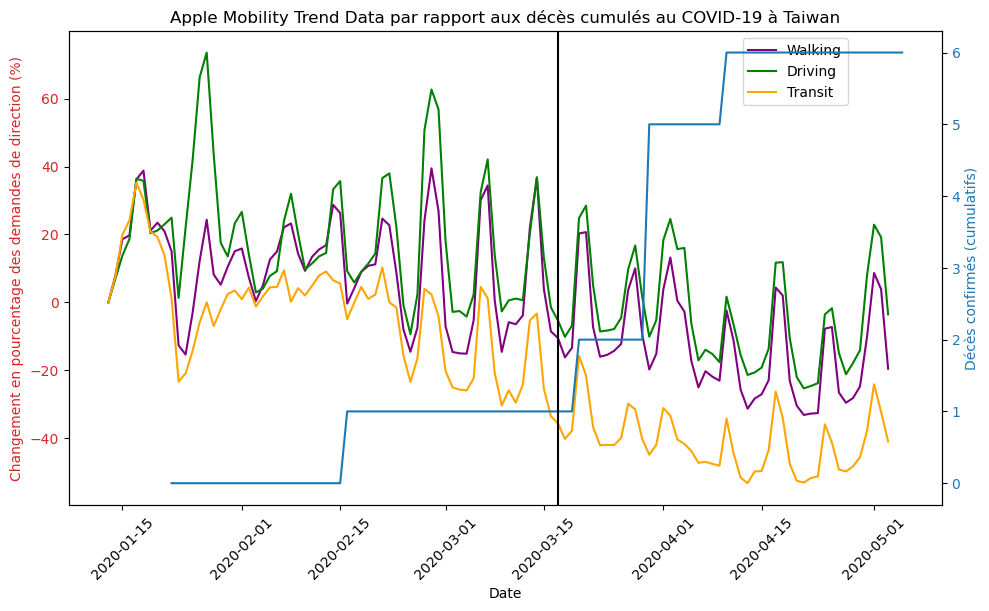

In [32]:
TW_walking = transpose_df('Taiwan', 'walking')
TW_driving = transpose_df('Taiwan', 'driving')
TW_transit = transpose_df('Taiwan', 'transit')
fig, ax1 = plt.subplots(figsize=(10, 6), dpi=100)

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
ax1.set_ylabel('Changement en pourcentage des demandes de direction (%)', color=color)
ax1.plot(TW_walking.index, TW_walking['Value'], label='Walking', color='purple')
ax1.plot(TW_driving.index, TW_driving['Value'], label='Driving', color='green')
ax1.plot(TW_transit.index, TW_transit['Value'], label='Transit', color='orange')
ax1.legend(bbox_to_anchor=(0.9,1), loc='upper right')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  

color = 'tab:blue'
ax2.set_ylabel('Décès confirmés (cumulatifs)', color=color)  
ax2.plot(TW_deaths.index, TW_deaths['Value'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout() 
plt.axvline(pandas.Timestamp('2020-03-17'), color='black')
plt.title('Apple Mobility Trend Data par rapport aux décès cumulés au COVID-19 à Taiwan')
plt.show()

Un cas totalement différent à Taiwan où la mobilité n'a pas diminué de manière aussi drastique par rapport aux valeurs antérieures au premier décès dans ce pays le 16 février

## Conclusions

Les résultats nous permettent de voir le potentiel des données dans l'analyse de la pandémie, il est évident que la mobilité n'est qu'une partie de toutes les ressources qui ont été considérées pour freiner le nombre de décès, dans certains cas extrêmes, les mesures de restriction des mouvements ils ne sont pas aussi efficaces que dans d'autres pays, cependant il est nécessaire de préparer une meilleure analyse en considérant le début des cas et de le comparer avec d'autres mesures prises comme le nombre de tests, les caractéristiques sociales et d'autres facteurs qui diminuent le nombre des décès.

En tant que première approximation de l'analyse du comportement social, les données nous donnent une idée de la façon dont les sociétés Apple et Google capturent nos données et les utilisent pour analyser leurs marchés.

<a href="https://trends.google.com/trends/?geo=FR">Google Trends</a>

<a href="https://pypi.org/project/pytrends/1.1.3/">pytrends 1.1.3</a>

<a href="https://www.researchgate.net/publication/333457255_Google_Trends_in_Infodemiology_and_Infoveillance_Methodology_Framework">Google Trends in Infodemiology and Infoveillance:MethodologyFramework</a>

<a href="https://towardsdatascience.com/tracking-coronavirus-engagement-with-google-trends-in-python-5a4b08bc6977">Analyzing Coronavirus Engagement with Google Trends in Python</a>

## 👍👍 <center> <a href="https://www.linkedin.com/in/lealrlx/">Partagez vos idées et vos commentaires, écrivez-moi 🌍 </a> </center>##